In [19]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install keras
!pip install pickle


[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<h1> Tiền xử lý dữ liệu </h1>

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing
import pickle
import matplotlib.pyplot as plt
from timeit import default_timer as timer

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [21]:
import os
for dirname, _, filenames in os.walk('/data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print(os.listdir('data/'))

['Signs.pickle']


In [22]:
with open('data/Signs.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')

data['y_train'] = to_categorical(data['y_train'], num_classes=43)
data['y_validation'] = to_categorical(data['y_validation'], num_classes=43)

data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

for i, j in data.items():
    if i == 'labels':
        print(i + ':', len(j))
    else:
        print(i + ':', j.shape)

y_test: (12630,)
y_validation: (4410, 43)
x_validation: (4410, 32, 32, 3)
x_train: (86989, 32, 32, 3)
y_train: (86989, 43)
labels: 43
x_test: (12630, 32, 32, 3)


In [23]:
%matplotlib inline

def convert_to_grid(x_input):
    N, H, W, C = x_input.shape
    grid_size = int(np.ceil(np.sqrt(N)))
    grid_height = H * grid_size + 1 * (grid_size - 1)
    grid_width = W * grid_size + 1 * (grid_size - 1)
    grid = np.zeros((grid_height, grid_width, C)) + 255
    next_idx = 0
    y0, y1 = 0, H
    for y in range(grid_size):
        x0, x1 = 0, W
        for x in range(grid_size):
            if next_idx < N:
                img = x_input[next_idx]
                low, high = np.min(img), np.max(img)
                grid[y0:y1, x0:x1] = 255.0 * (img - low) / (high - low)
                next_idx += 1
            x0 += W + 1
            x1 += W + 1
        y0 += H + 1
        y1 += H + 1

    return grid

In [24]:
examples = data['x_train'][:81, :, :, :]
print(examples.shape)  # (81, 32, 32, 3)

(81, 32, 32, 3)


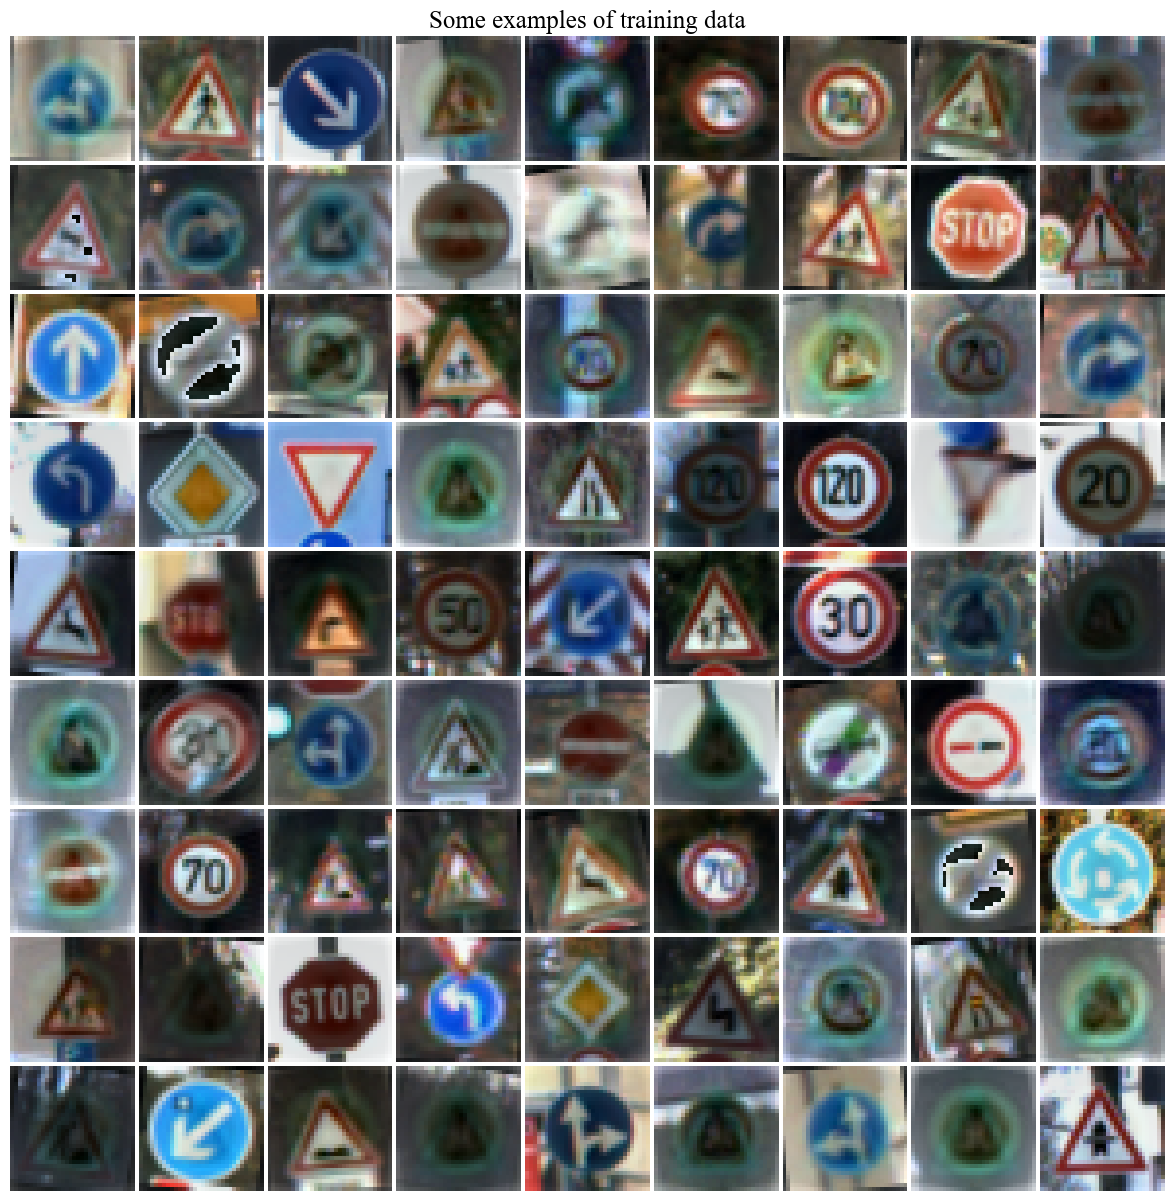

In [25]:
# Plotting some examples
fig = plt.figure()
grid = convert_to_grid(examples)
plt.imshow(grid.astype('uint8'), cmap='gray')
plt.axis('off')
plt.gcf().set_size_inches(15, 15)
plt.title('Some examples of training data', fontsize=18)

plt.show()

fig.savefig('training_examples.png')
plt.close()

In [26]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(43, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Chạy thử với số hình ảnh thấp

In [27]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 15

h = model.fit(data['x_train'][:10], data['y_train'][:10],
              batch_size=5, epochs = epochs,
              validation_data = (data['x_validation'], data['y_validation']),
              callbacks=[annealer], verbose=1)

Epoch 1/15
2/2 [==============================] - 4s 3s/step - loss: 3.7799 - accuracy: 0.0000e+00 - val_loss: 3.8020 - val_accuracy: 0.0277 - lr: 4.6329e-04
Epoch 2/15
2/2 [==============================] - 3s 3s/step - loss: 2.9532 - accuracy: 0.3000 - val_loss: 4.0194 - val_accuracy: 0.0413 - lr: 4.4013e-04
Epoch 3/15
2/2 [==============================] - 3s 3s/step - loss: 2.3651 - accuracy: 0.4000 - val_loss: 4.5314 - val_accuracy: 0.0426 - lr: 4.1812e-04
Epoch 4/15
2/2 [==============================] - 3s 3s/step - loss: 1.9053 - accuracy: 0.5000 - val_loss: 5.2234 - val_accuracy: 0.0417 - lr: 3.9721e-04
Epoch 5/15
2/2 [==============================] - 3s 3s/step - loss: 1.5867 - accuracy: 0.6000 - val_loss: 5.9370 - val_accuracy: 0.0415 - lr: 3.7735e-04
Epoch 6/15
2/2 [==============================] - 3s 3s/step - loss: 1.3314 - accuracy: 0.7000 - val_loss: 6.6008 - val_accuracy: 0.0404 - lr: 3.5849e-04
Epoch 7/15
2/2 [==============================] - 3s 3s/step - loss: 1.1

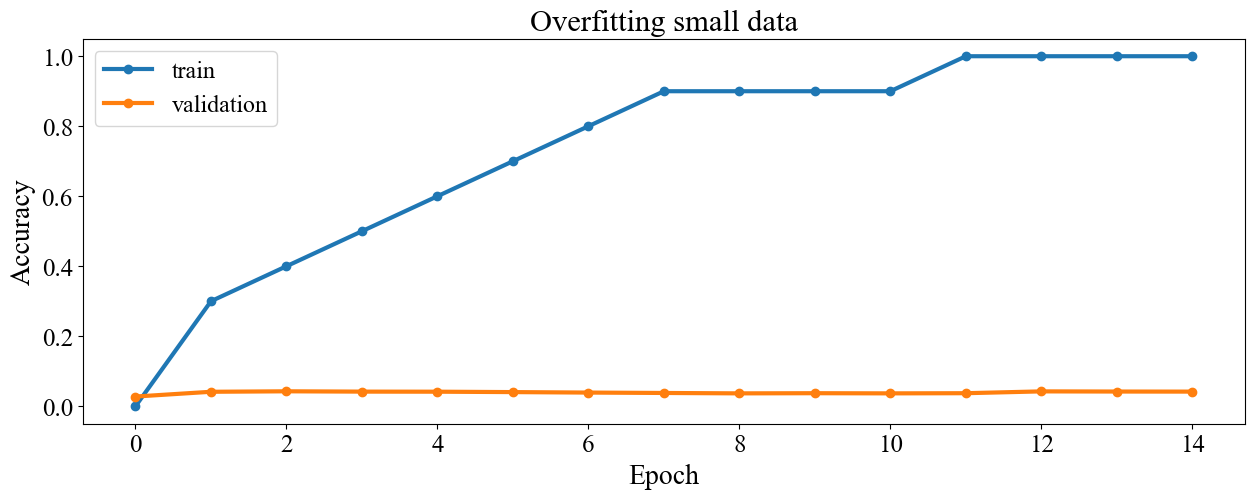

In [28]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 5.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['font.family'] = 'Times New Roman'

fig = plt.figure()
plt.plot(h.history['accuracy'], '-o', linewidth=3.0)
plt.plot(h.history['val_accuracy'], '-o', linewidth=3.0)
plt.title('Overfitting small data', fontsize=22)
plt.legend(['train', 'validation'], loc='upper left', fontsize='xx-large')
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.tick_params(labelsize=18)

plt.show()

fig.savefig('overfitting_small_data.png')
plt.close()

In [29]:
filters = [3, 5, 9, 13, 15, 19, 23, 25, 31]
model = [0] * len(filters)

for i in range(len(model)):
    model[i] = Sequential()
    model[i].add(Conv2D(32, kernel_size=filters[i], padding='same', activation='relu', input_shape=(32, 32, 3)))
    model[i].add(MaxPool2D(pool_size=2))
    model[i].add(Flatten())
    model[i].add(Dense(500, activation='relu'))
    model[i].add(Dense(43, activation='softmax'))
    model[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 5

h = [0] * len(model)

for i in range(len(h)):
    h[i] = model[i].fit(data['x_train'], data['y_train'],
                        batch_size=5, epochs = epochs,
                        validation_data = (data['x_validation'], data['y_validation']),
                        callbacks=[annealer], verbose=1)

    print('Model with filters {0:d}x{0:d}, epochs={1:d}, training accuracy={2:.5f}, validation accuracy={3:.5f}'.\
      format(filters[i], epochs, max(h[i].history['accuracy']), max(h[i].history['val_accuracy'])))

Epoch 1/5
17398/17398 [==============================] - 650s 37ms/step - loss: 0.4538 - accuracy: 0.8770 - val_loss: 0.7664 - val_accuracy: 0.8295 - lr: 7.7378e-04
Epoch 2/5
 6657/17398 [==========>...................] - ETA: 6:52 - loss: 0.1261 - accuracy: 0.9646

KeyboardInterrupt: 